# 30 Day Map Challenge: Day 6 (Asia)

This is a notebook for day 6 of [30 Day Map Challenge](https://30daymapchallenge.com/).

This data comes from the UN's ["Rivers of South and East Asia"](https://data.apps.fao.org/catalog/iso/dc2a5121-0b32-482b-bd9b-64f7a414fa0d).

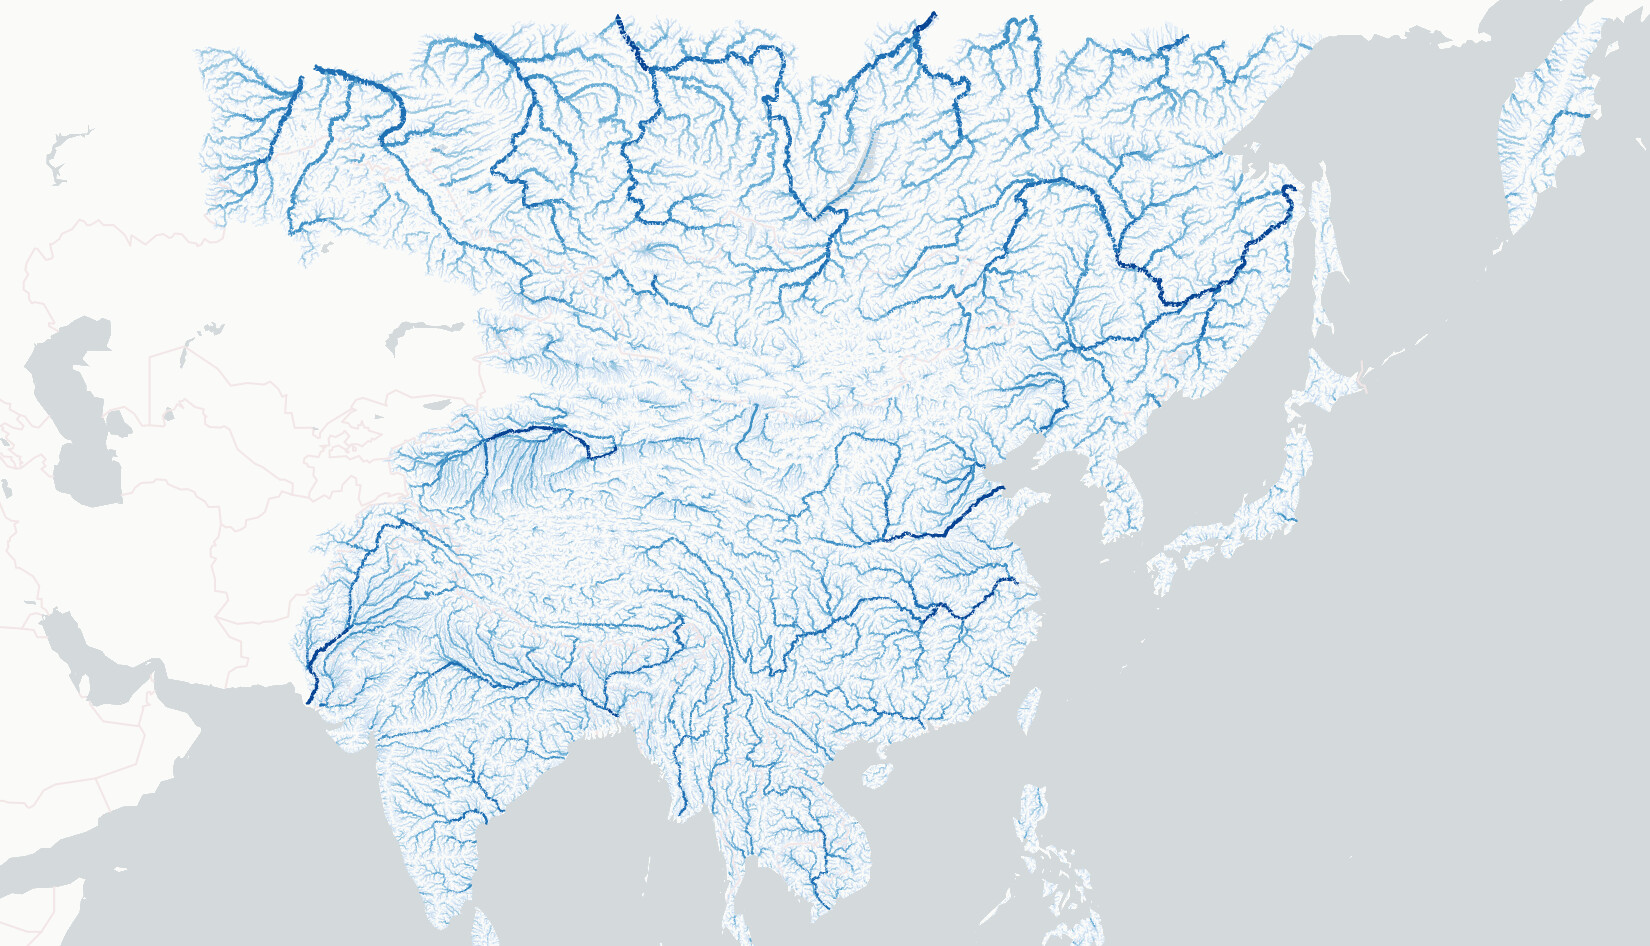

## Imports

In [1]:
import geopandas as gpd
from palettable.colorbrewer.sequential import Blues_8

from lonboard import Map, PathLayer
from lonboard.colormap import apply_continuous_cmap

## Fetch the data

In [2]:
url = "https://storage.googleapis.com/fao-maps-catalog-data/geonetwork/aquamaps/rivers_asia_37331.zip"

In [3]:
gdf = gpd.read_file(url, engine="pyogrio")

The `Strahler` column seems to refer to how important/central the particular river is. It ranges from 1-7.

In [4]:
gdf["Strahler"].value_counts()

Strahler
1    80503
2    39100
3    19655
4     8960
5     4547
6     1901
7      484
Name: count, dtype: int64

We'll use `Strahler` to plot more central rivers in both a darker blue and with a wider line.

In [5]:
layer = PathLayer.from_geopandas(gdf)
layer.get_color = apply_continuous_cmap(gdf["Strahler"] / 7, Blues_8)
layer.get_width = gdf["Strahler"]
layer.width_scale = 3000
layer.width_min_pixels = 0.5

m = Map(layers=[layer])
m

Map(layers=[PathLayer(get_color=<pyarrow.lib.FixedSizeListArray object at 0x107cbb220>
[
  [
    8,
    69,
  …